In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
%matplotlib inline
import os
import re


In [5]:
df = pd.read_json(r'C:\Users\Lovy Dhankhar\Desktop\DLNLP\Project 2\Sarcasm_Headlines_Dataset.json', lines=True)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [6]:
df = df[['headline','is_sarcastic']]
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sarcasm vs Non-sarcasm')

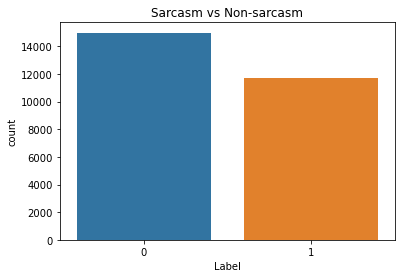

In [7]:
sns.countplot(df.is_sarcastic)
plt.xlabel('Label')
plt.title('Sarcasm vs Non-sarcasm')

In [8]:
df['headline'] = df['headline'].apply(lambda x: x.lower())
df['headline'] = df['headline'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [9]:
for idx,row in df.iterrows():
    row[0] = row[0].replace('rt',' ')
    
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['headline'].values)
X = tokenizer.texts_to_sequences(df['headline'].values)
X = pad_sequences(X)

In [10]:
Y = pd.get_dummies(df['is_sarcastic']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(17895, 29) (17895, 2)
(8814, 29) (8814, 2)


In [11]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [12]:
batch_size = 32
history = model.fit(X_train, Y_train, epochs = 25, batch_size=batch_size, verbose = 2)

Epoch 1/25
560/560 - 36s - loss: 0.4427 - accuracy: 0.7887 - 36s/epoch - 65ms/step
Epoch 2/25
560/560 - 34s - loss: 0.3355 - accuracy: 0.8553 - 34s/epoch - 60ms/step
Epoch 3/25
560/560 - 34s - loss: 0.2984 - accuracy: 0.8733 - 34s/epoch - 61ms/step
Epoch 4/25
560/560 - 33s - loss: 0.2739 - accuracy: 0.8826 - 33s/epoch - 59ms/step
Epoch 5/25
560/560 - 33s - loss: 0.2501 - accuracy: 0.8954 - 33s/epoch - 59ms/step
Epoch 6/25
560/560 - 34s - loss: 0.2330 - accuracy: 0.9029 - 34s/epoch - 60ms/step
Epoch 7/25
560/560 - 33s - loss: 0.2133 - accuracy: 0.9108 - 33s/epoch - 59ms/step
Epoch 8/25
560/560 - 33s - loss: 0.1984 - accuracy: 0.9183 - 33s/epoch - 59ms/step
Epoch 9/25
560/560 - 33s - loss: 0.1740 - accuracy: 0.9276 - 33s/epoch - 59ms/step
Epoch 10/25
560/560 - 33s - loss: 0.1648 - accuracy: 0.9324 - 33s/epoch - 59ms/step
Epoch 11/25
560/560 - 33s - loss: 0.1509 - accuracy: 0.9362 - 33s/epoch - 59ms/step
Epoch 12/25
560/560 - 33s - loss: 0.1341 - accuracy: 0.9456 - 33s/epoch - 59ms/step
E

In [13]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

229/229 - 7s - loss: 1.0242 - accuracy: 0.8105 - 7s/epoch - 32ms/step
score: 1.02
acc: 0.81


In [15]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_validate)):
    
    result = model.predict(X_validate[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]
   
    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y_validate[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1



print("Sarcasm_acc", pos_correct/pos_cnt*100, "%")
print("Non-Sarcasm_acc", neg_correct/neg_cnt*100, "%")

1/1 - 0s - 305ms/epoch - 305ms/step
1/1 - 0s - 8ms/epoch - 8ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 22ms/epoch - 22ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 11ms/epoch - 11ms/step
1/1 - 0s - 36ms/epoch - 36ms/step
1/1 - 0s - 25ms/epoch - 25ms/step
1/1 - 0s - 21ms/epoch - 21ms/step
1/1 - 0s - 27ms/epoch - 27ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 26ms/epoch - 26ms/step
1/1 - 0s - 25ms/epoch - 25ms/step
1/1 - 0s - 20ms/epoch - 20ms/step
1/1 - 0s - 23ms/epoch - 23ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 25ms/epoch - 25ms/step
1/1 - 0s - 19ms/epoch - 19ms/step
1/1 - 0s - 34m

1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 33ms/epoch - 33ms/step
1/1 - 0s - 11ms/epoch - 11ms/step
1/1 - 0s - 28ms/epoch - 28ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 27ms/epoch - 27ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 18ms/epoch - 18ms/step
1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 23ms/epoch - 23ms/step
1/1 - 0s - 25ms/epoch - 25ms/step
1/1 - 0s - 35ms/epoch - 35ms/step
1/1 - 0s - 17ms/epoch - 17ms/step
1/1 - 0s - 23ms/epoch - 23ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 29ms/epoch - 29ms/step
1/1 - 0s - 29ms/epoch - 29ms/step
1/1 - 0s - 40ms/epoch - 40ms/step
1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 27ms/epoch - 27ms/step
1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 18ms/epoch - 18ms/step
1/1 - 0s - 48ms/epoch - 48ms/step
1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 26ms/epoch - 26ms/step
1/1 - 0s - 31m

1/1 - 0s - 26ms/epoch - 26ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 22ms/epoch - 22ms/step
1/1 - 0s - 25ms/epoch - 25ms/step
1/1 - 0s - 27ms/epoch - 27ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 23ms/epoch - 23ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 8ms/epoch - 8ms/step
1/1 - 0s - 23ms/epoch - 23ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 29ms/epoch - 29ms/step
1/1 - 0s - 21ms/epoch - 21ms/step
1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 26ms/epoch - 26ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 17ms/epoch - 17ms/step
1/1 - 0s - 16ms/

1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 17ms/epoch - 17ms/step
1/1 - 0s - 29ms/epoch - 29ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 33ms/epoch - 33ms/step
1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 22ms/epoch - 22ms/step
1/1 - 0s - 39ms/epoch - 39ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 15ms/epoch - 15ms/step
1/1 - 0s - 28ms/epoch - 28ms/step
1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 19ms/epoch - 19ms/step
1/1 - 0s - 25ms/epoch - 25ms/step
1/1 - 0s - 28ms/epoch - 28ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 29ms/epoch - 29ms/step
1/1 - 0s - 25ms/epoch - 25ms/step
1/1 - 0s - 16m

1/1 - 0s - 25ms/epoch - 25ms/step
1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 19ms/epoch - 19ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 23ms/epoch - 23ms/step
1/1 - 0s - 27ms/epoch - 27ms/step
1/1 - 0s - 19ms/epoch - 19ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 23ms/epoch - 23ms/step
1/1 - 0s - 30ms/epoch - 30ms/step
1/1 - 0s - 30ms/epoch - 30ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 27ms/epoch - 27ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 16m

1/1 - 0s - 26ms/epoch - 26ms/step
1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 15ms/epoch - 15ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 40ms/epoch - 40ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 25ms/epoch - 25ms/step
1/1 - 0s - 25ms/epoch - 25ms/step
1/1 - 0s - 8ms/epoch - 8ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 9ms/epoch - 9ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 28ms/epoch - 28ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 13ms/epoch - 13ms/step
1/1 - 0s - 31ms/ep

1/1 - 0s - 13ms/epoch - 13ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 30ms/epoch - 30ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 29ms/epoch - 29ms/step
1/1 - 0s - 16m

In [20]:
headline = ['Chowkidar hi chor hai']
headline = tokenizer.texts_to_sequences(headline)
headline = pad_sequences(headline, maxlen=29, dtype='int32', value=0)

sentiment = model.predict(headline,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("Non-sarcastic")
elif (np.argmax(sentiment) == 1):
    print("Sarcasm")

1/1 - 0s - 16ms/epoch - 16ms/step
Sarcasm


In [22]:
headline = ["air force will no longer require 'so help me god' in enlistment oaths"]
headline = tokenizer.texts_to_sequences(headline)
headline = pad_sequences(headline, maxlen=29, dtype='int32', value=0)

sentiment = model.predict(headline,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("Non-sarcastic")
elif (np.argmax(sentiment) == 1):
    print("Sarcasm")

1/1 - 0s - 8ms/epoch - 8ms/step
Non-sarcastic


In [23]:
headline = ['frontier airlines tells customers to just fucking deal with it']
headline = tokenizer.texts_to_sequences(headline)
headline = pad_sequences(headline, maxlen=29, dtype='int32', value=0)

sentiment = model.predict(headline,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("Non-sarcastic")
elif (np.argmax(sentiment) == 1):
    print("Sarcasm")

1/1 - 0s - 23ms/epoch - 23ms/step
Sarcasm


In [24]:
headline = ['there is no right way, just write']
headline = tokenizer.texts_to_sequences(headline)
headline = pad_sequences(headline, maxlen=29, dtype='int32', value=0)

sentiment = model.predict(headline,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("Non-sarcastic")
elif (np.argmax(sentiment) == 1):
    print("Sarcasm")

1/1 - 0s - 19ms/epoch - 19ms/step
Non-sarcastic


In [25]:
headline = ['local laundromat employs social media coordinator']
headline = tokenizer.texts_to_sequences(headline)
headline = pad_sequences(headline, maxlen=29, dtype='int32', value=0)

sentiment = model.predict(headline,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("Non-sarcastic")
elif (np.argmax(sentiment) == 1):
    print("Sarcasm")

1/1 - 0s - 36ms/epoch - 36ms/step
Sarcasm
